# LINZ and OTHER data analysis

In [14]:
# basic
import os
import numpy as np
import pandas as pd
import xarray as xr

# plotting
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# bluemath toolkit library
import sys
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

from sscode.data import Loader
from sscode.plotting.utils import plot_ccrs_nz


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



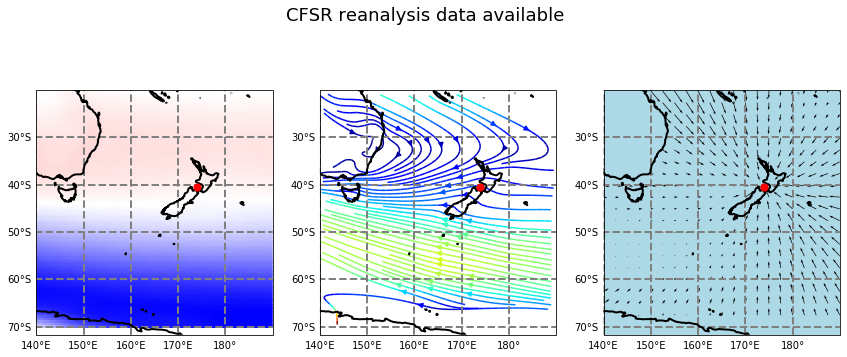


 loading the Moana v2 hindcast data... 



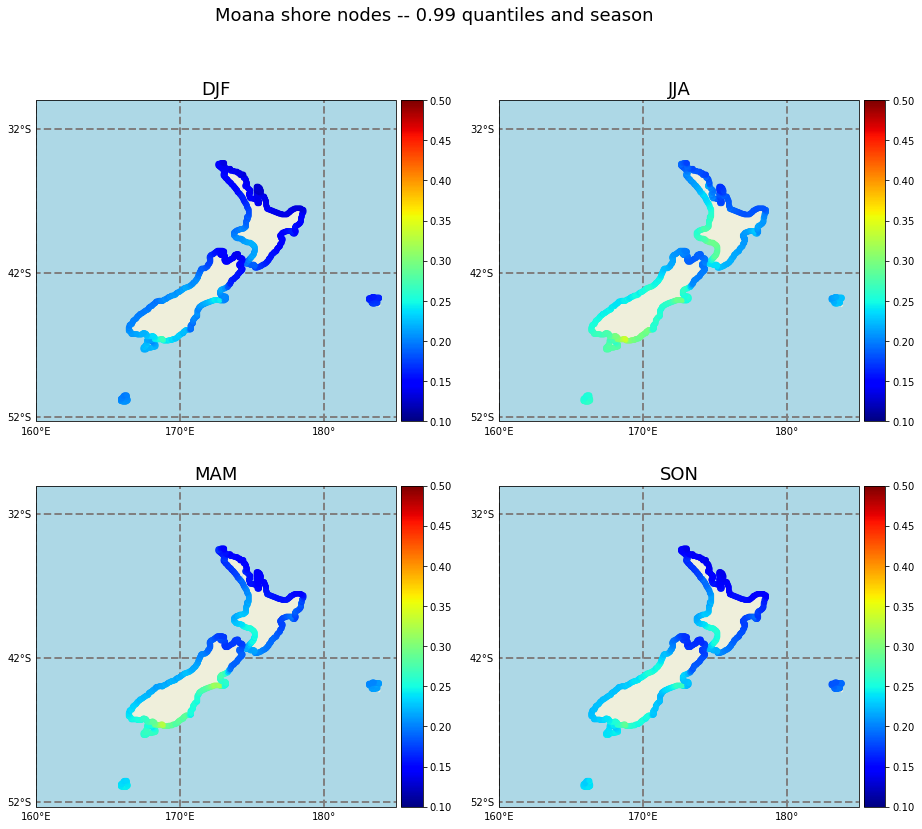


 loading and plotting the LINZ tidal guages... 



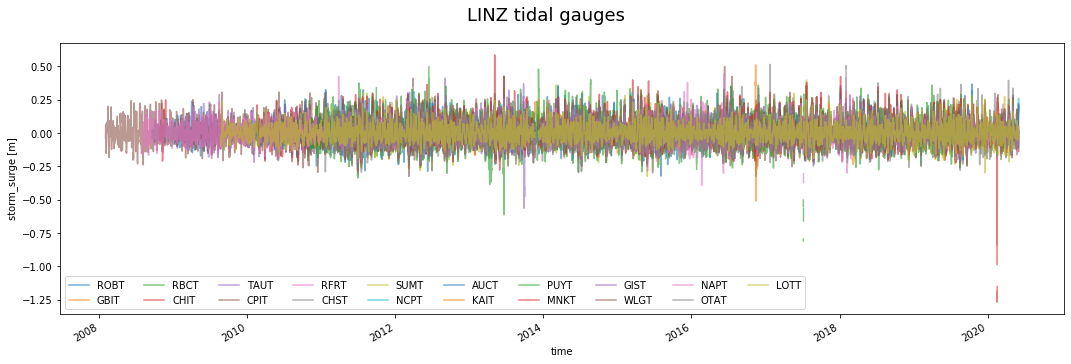

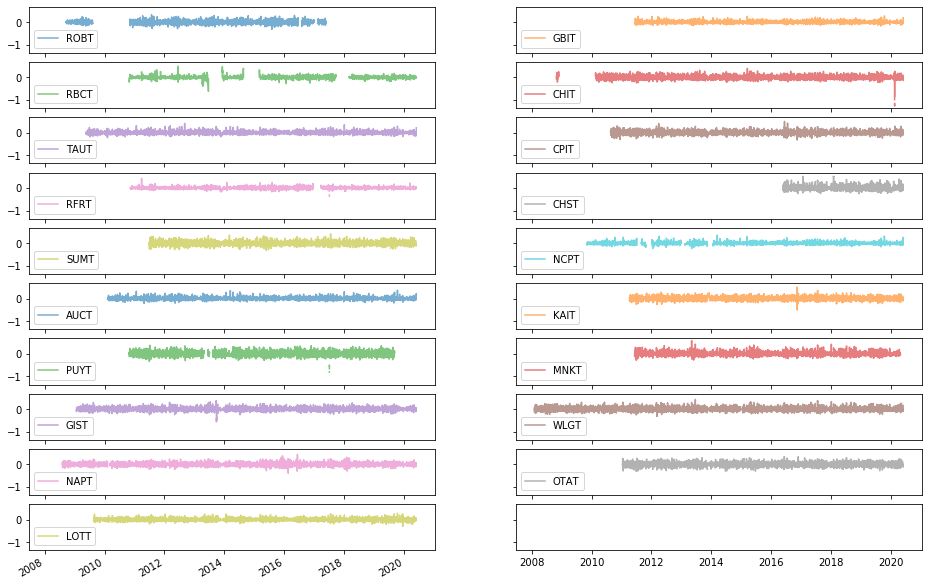


 Lets compare data in Moana v2 hindcast with LINZ tgs!! 


 
 TGs to analyze are: 
 ['GBIT' 'CHIT' 'TAUT' 'CPIT' 'CHST' 'SUMT' 'NCPT' 'AUCT' 'KAIT' 'PUYT'
 'MNKT' 'GIST' 'WLGT' 'NAPT' 'OTAT' 'LOTT'] 


 which correspond to 
 [1296, 378, 1124, 780, 613, 488, 1442, 1217, 578, 200, 1177, 1025, 689, 949, 224, 1146] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to LINZ tgs: 
 [5.319717747423619, 2.318472050133609, 4.698606345256596, 4.106133965791829, 3.1307877704095715, 17.988003692172256, 1.2755996354300694, 5.878134710490101, 2.1041482521719543, 4.015667223503161, 3.168586231604361, 5.3741308824231755, 10.09186164411121, 1.8956937268750171, 9.621120849018142, 4.625968007830678] 



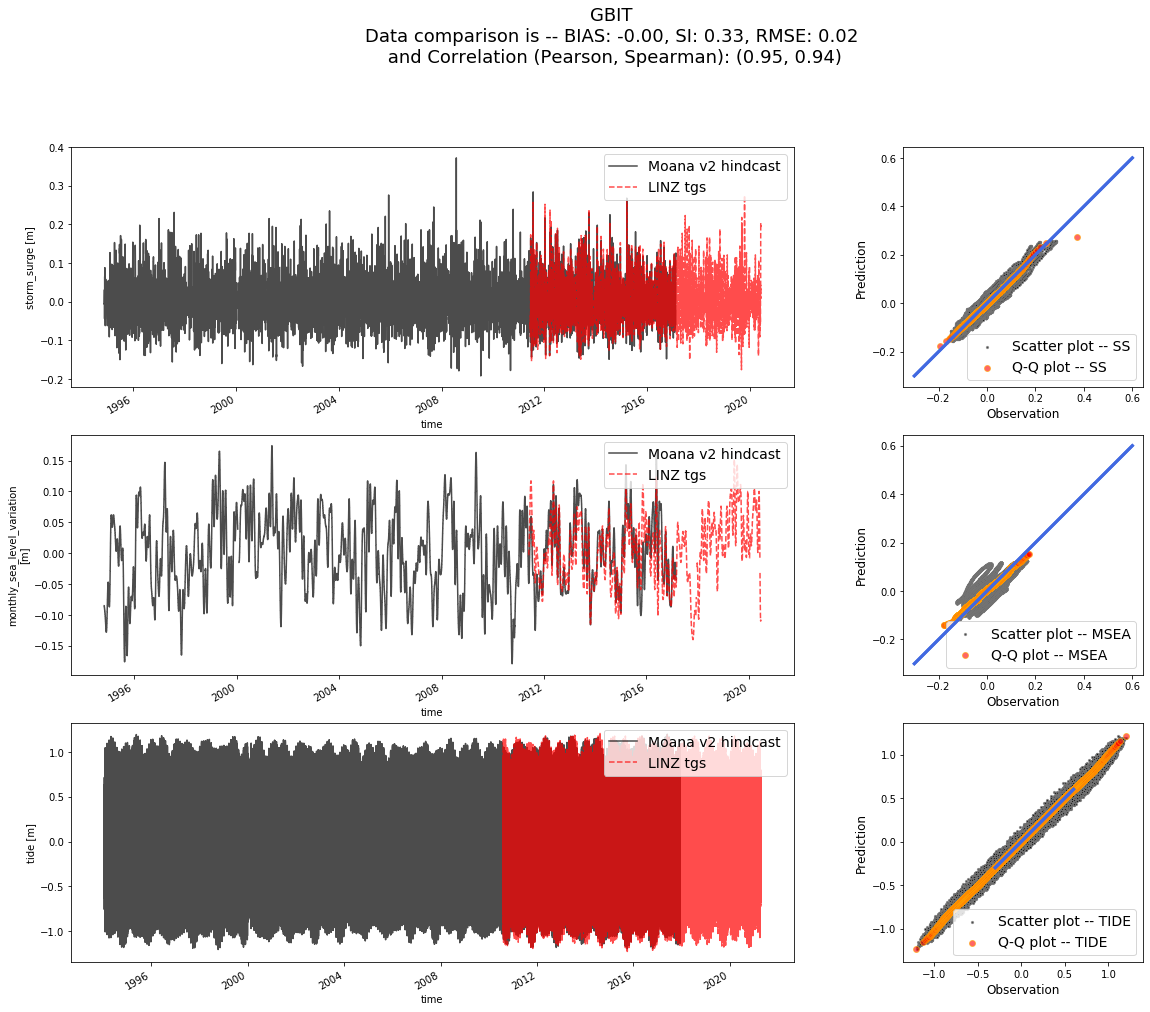

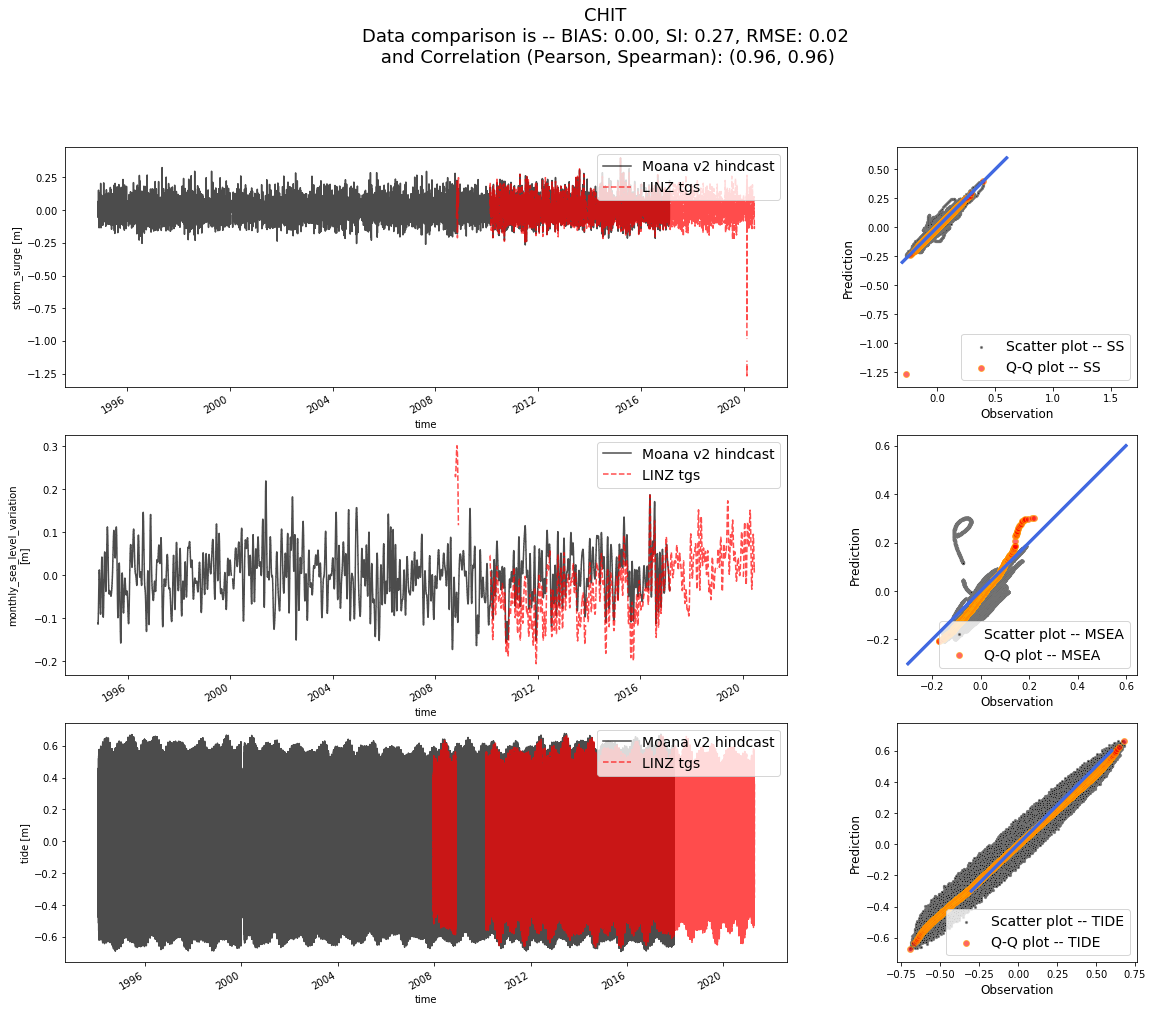

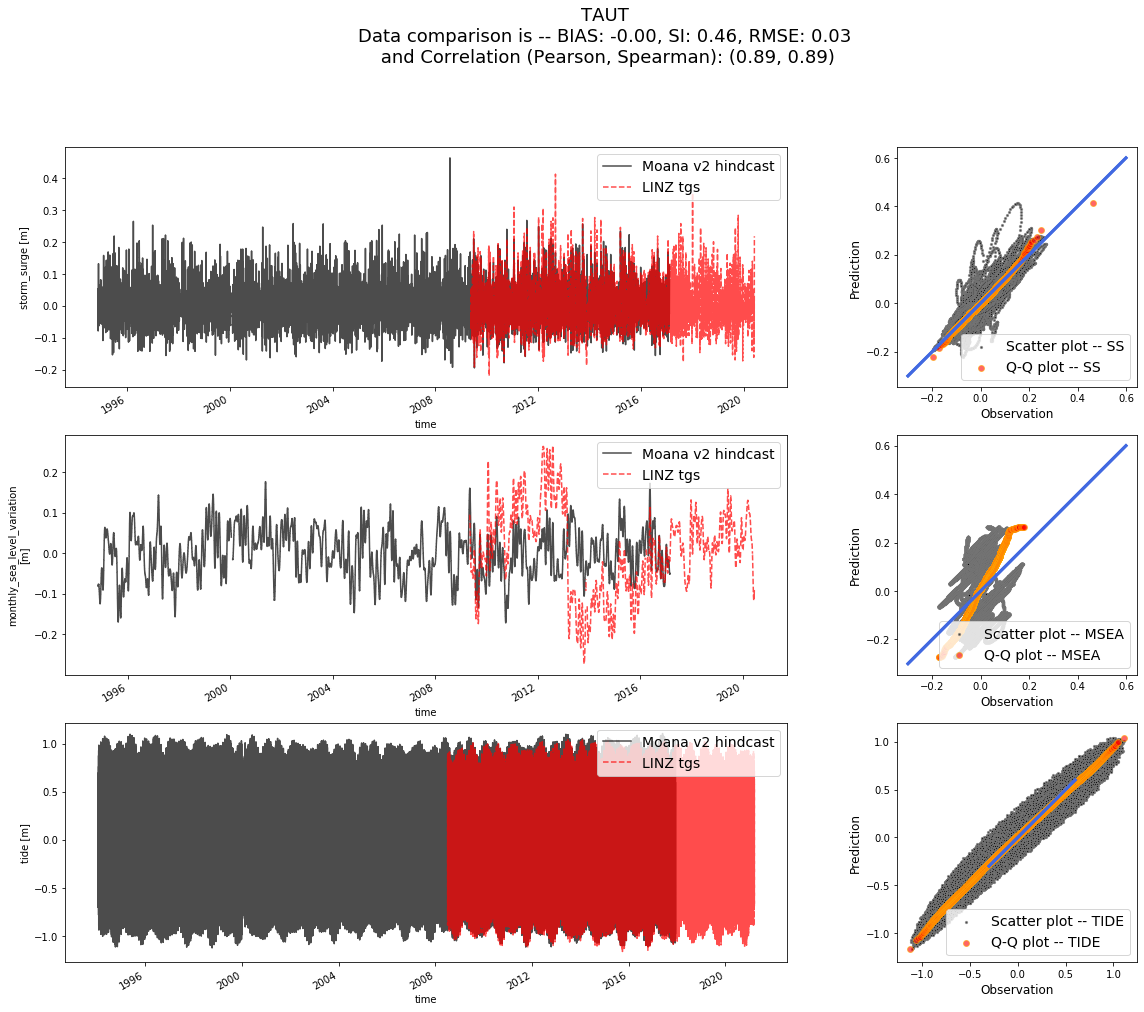

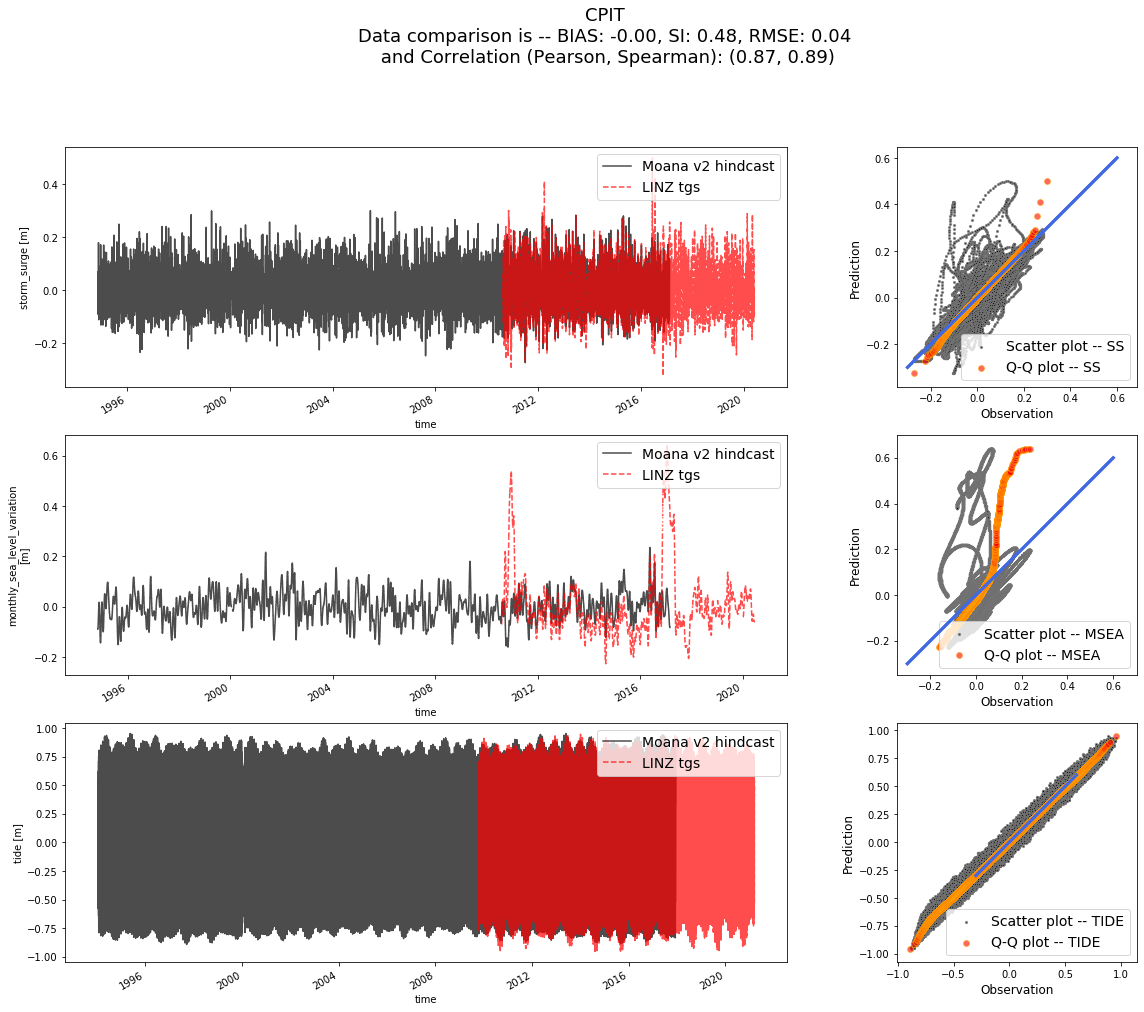

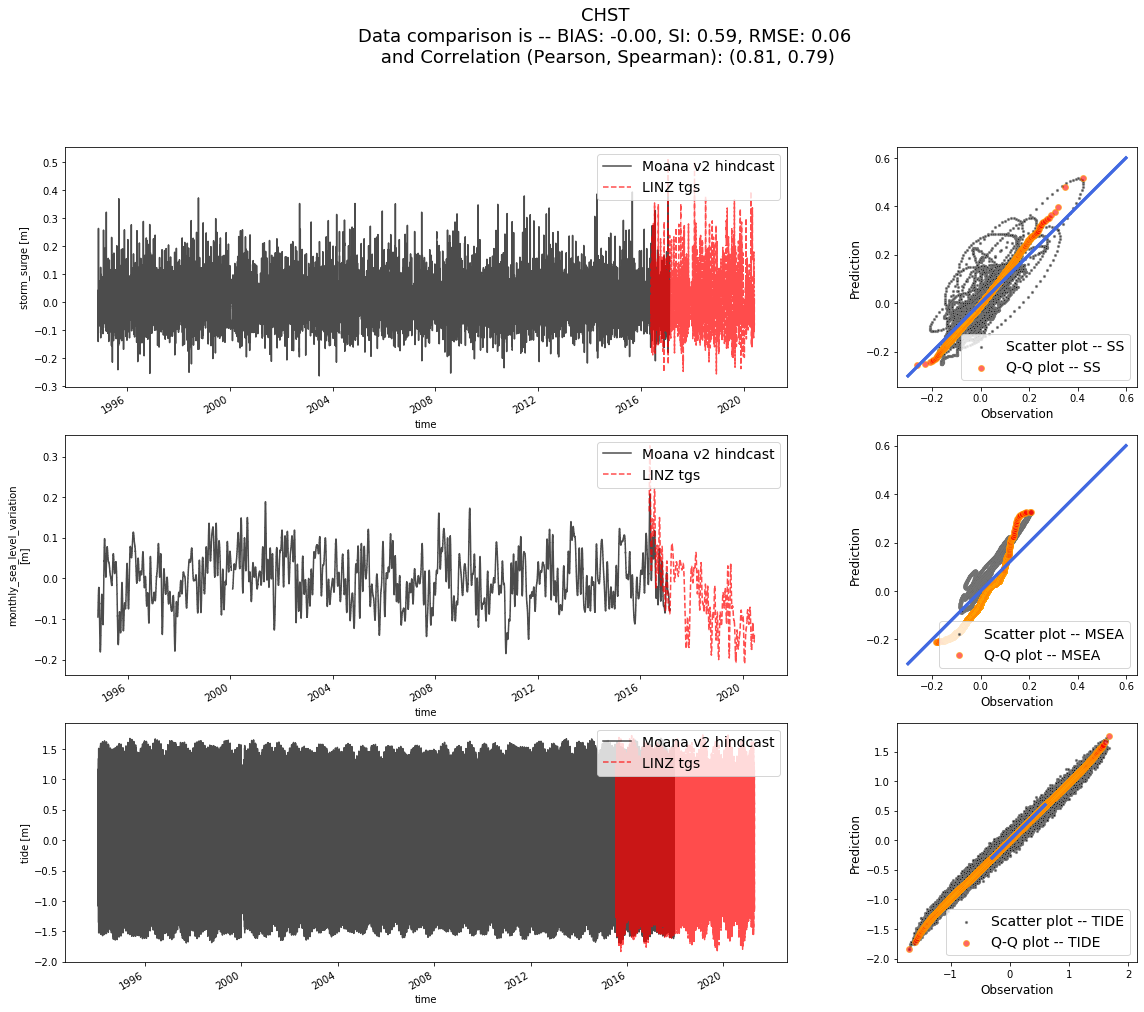

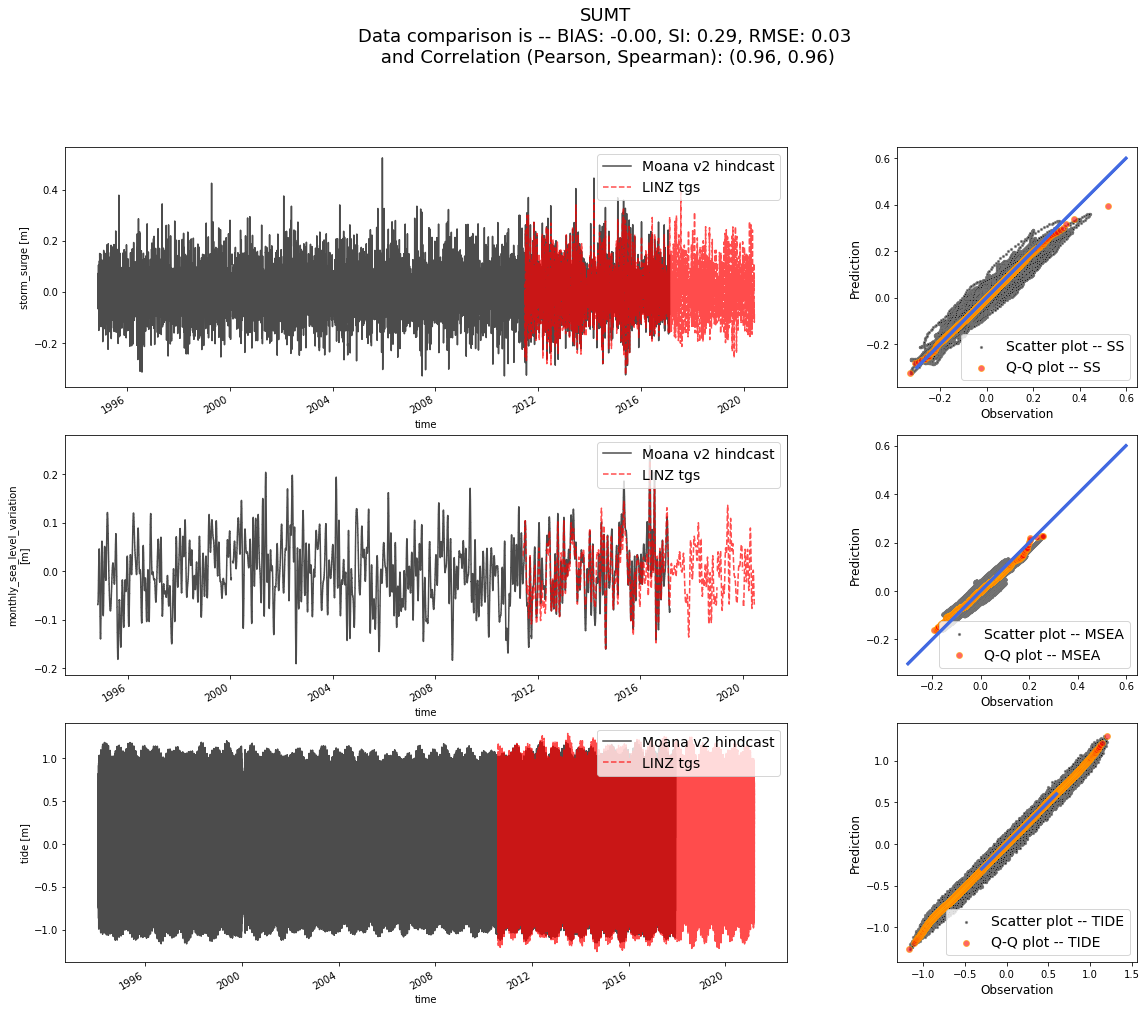

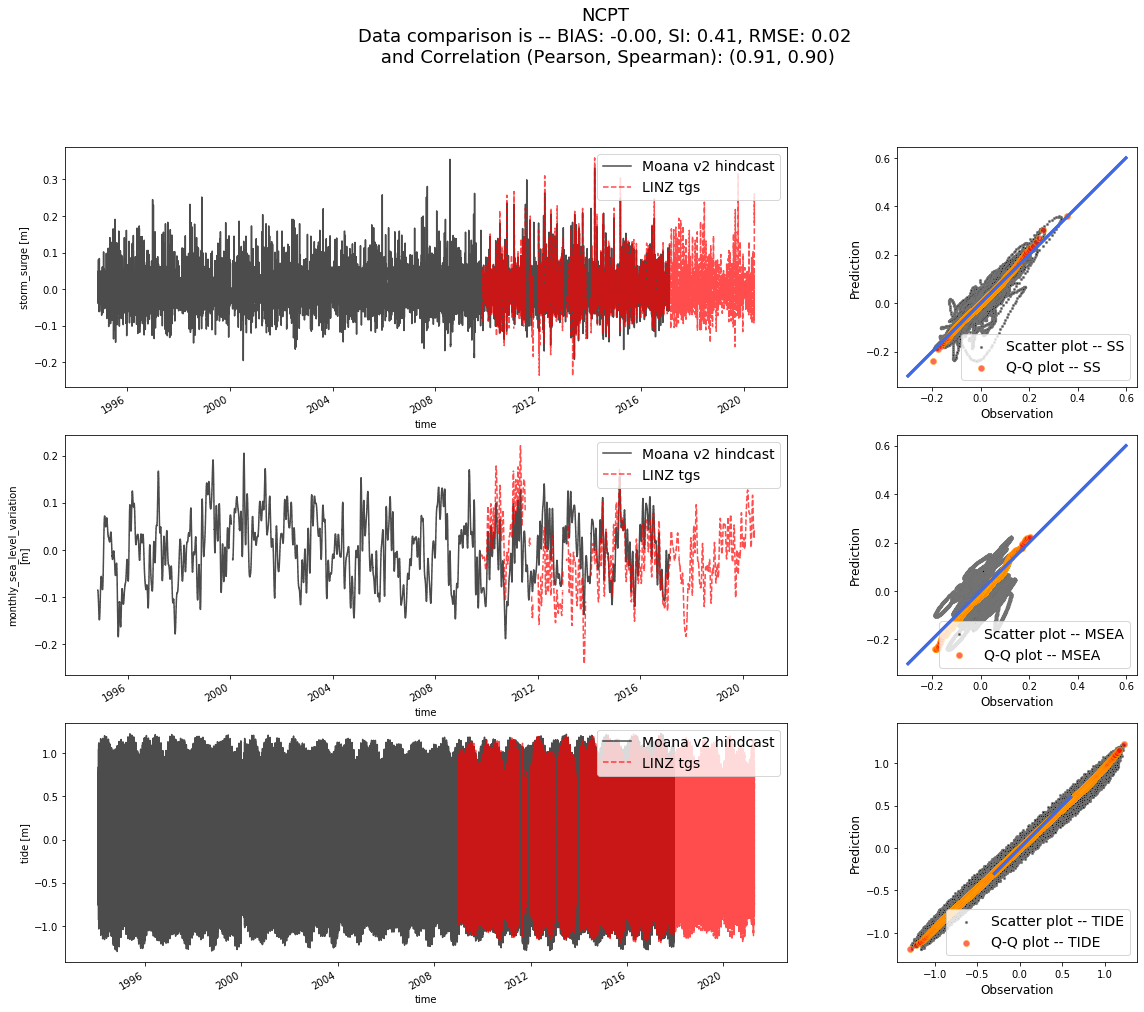

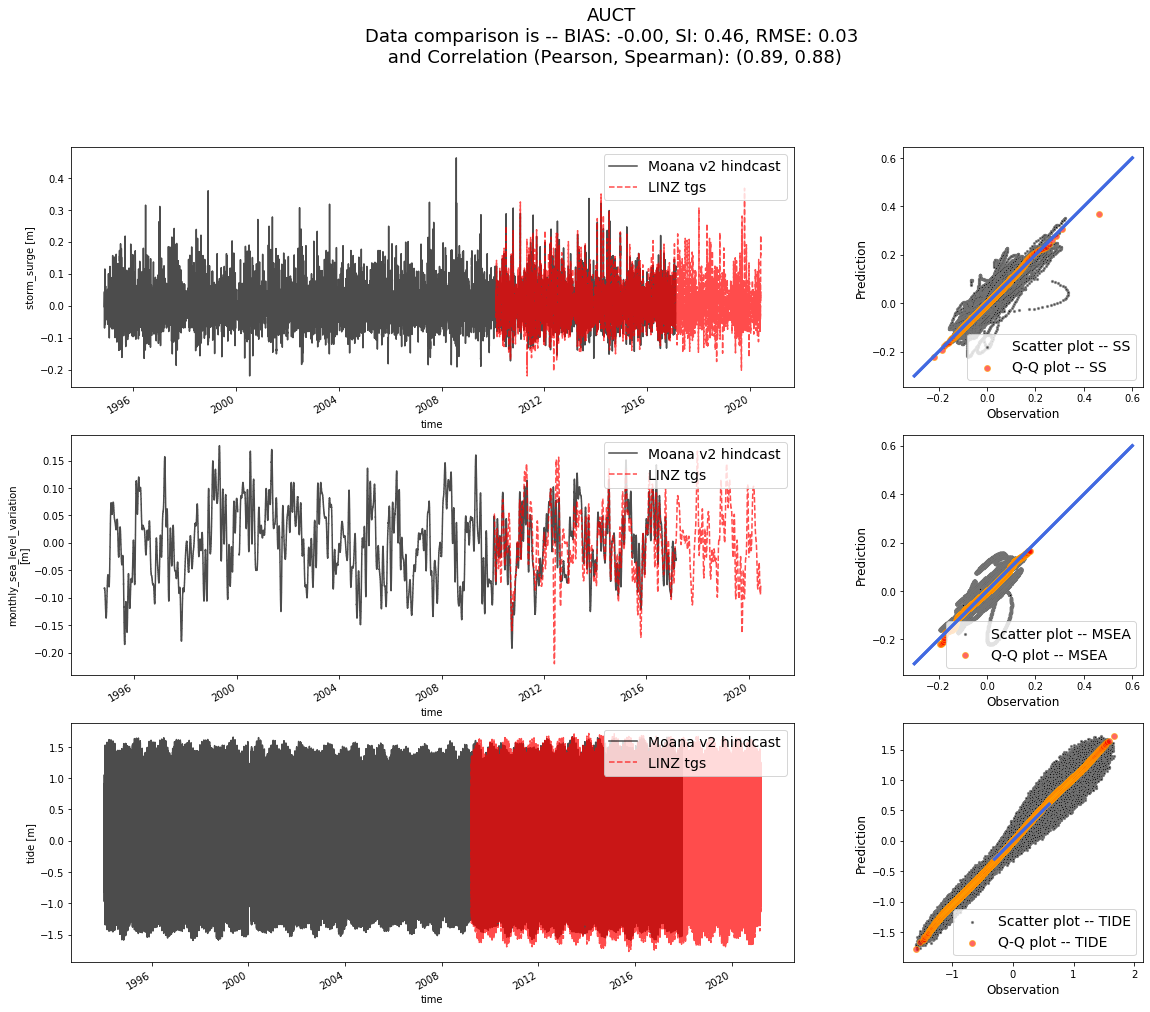

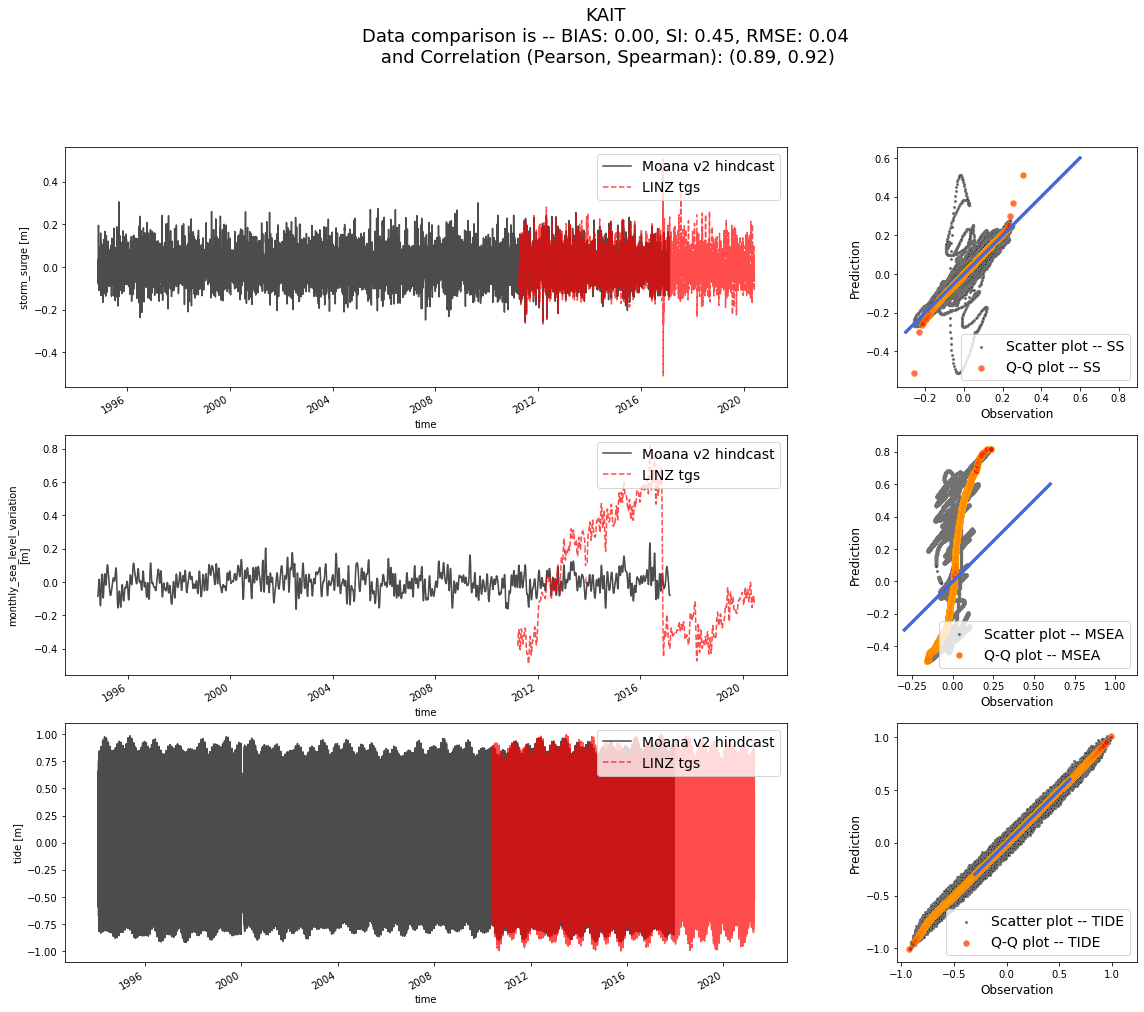

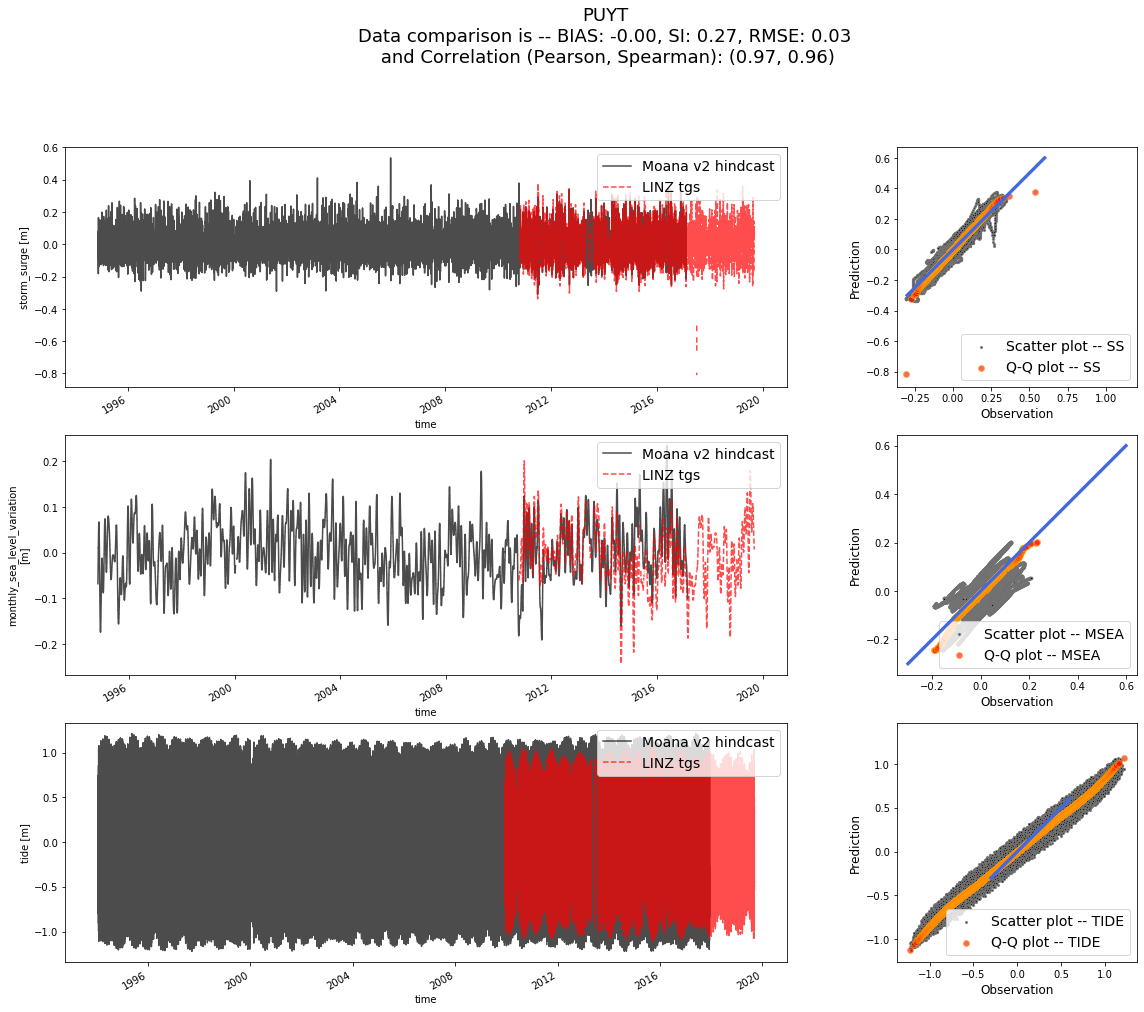

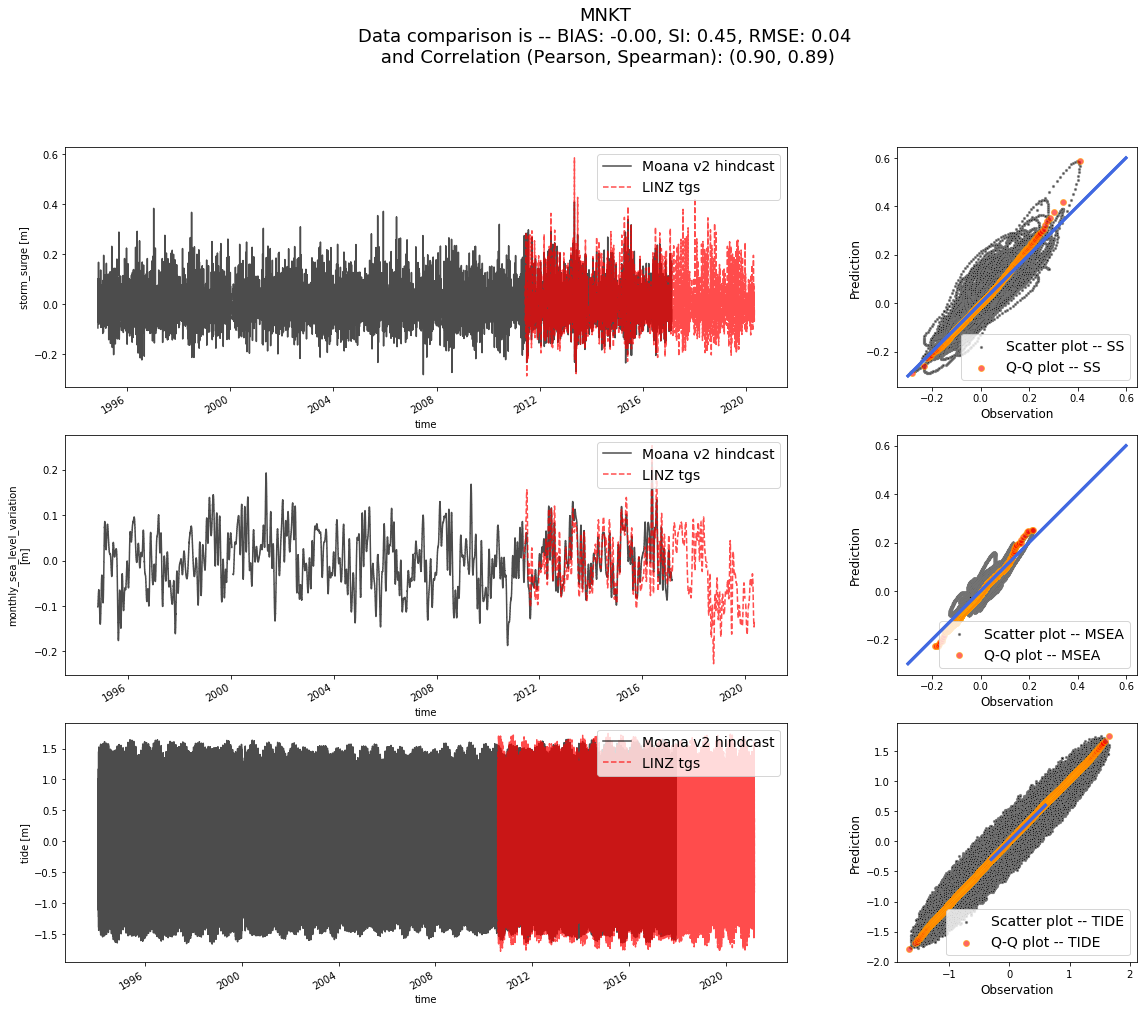

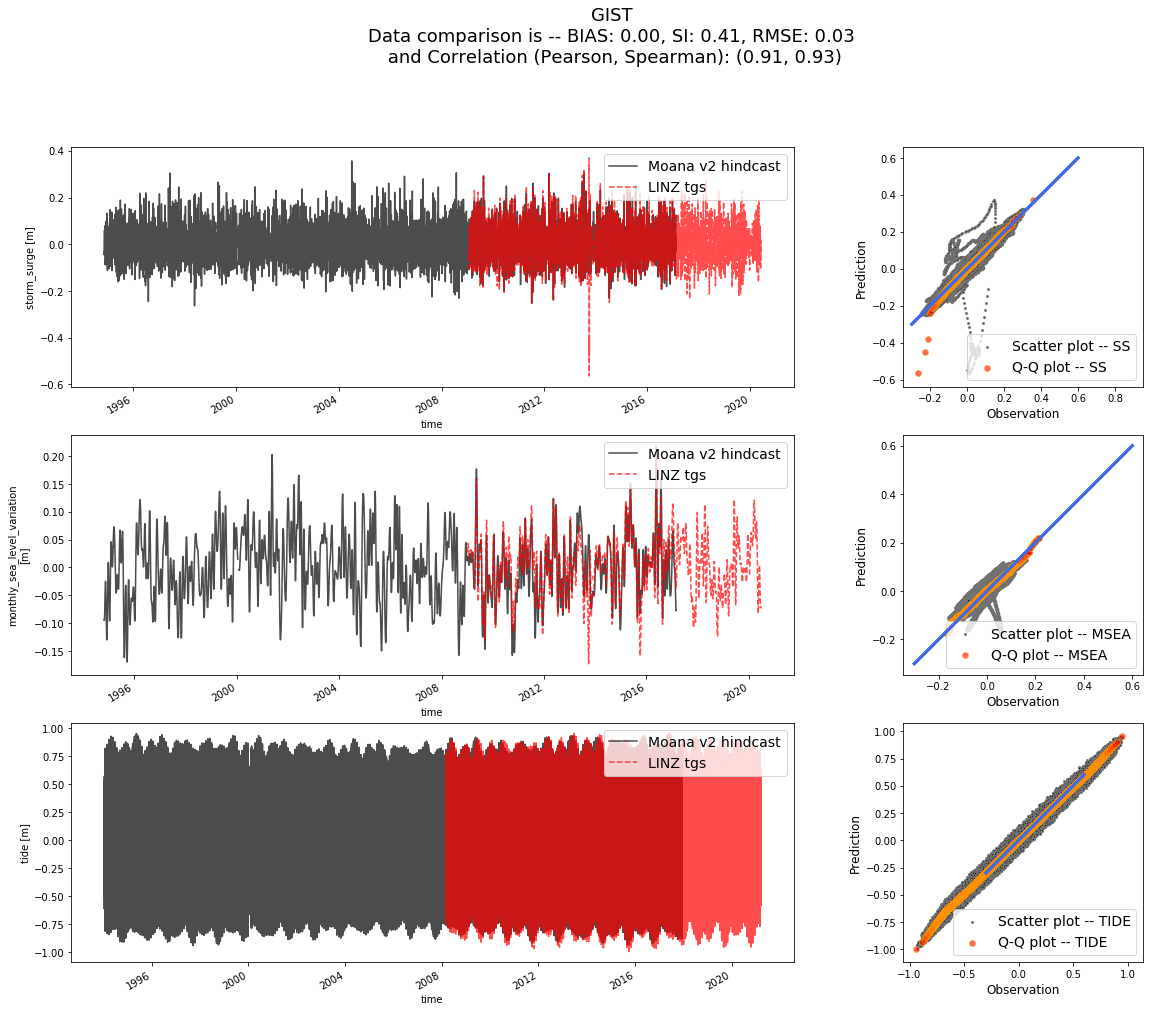

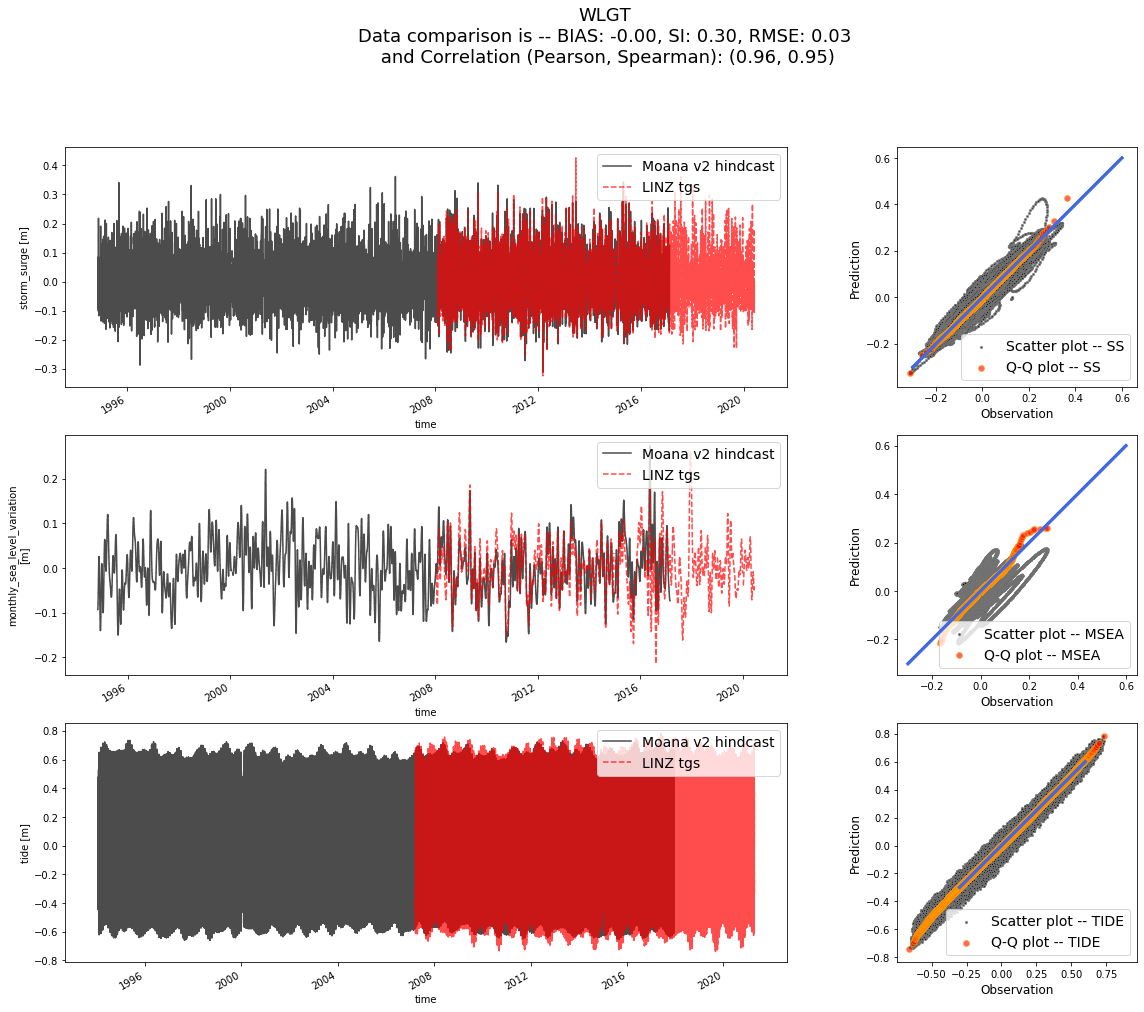

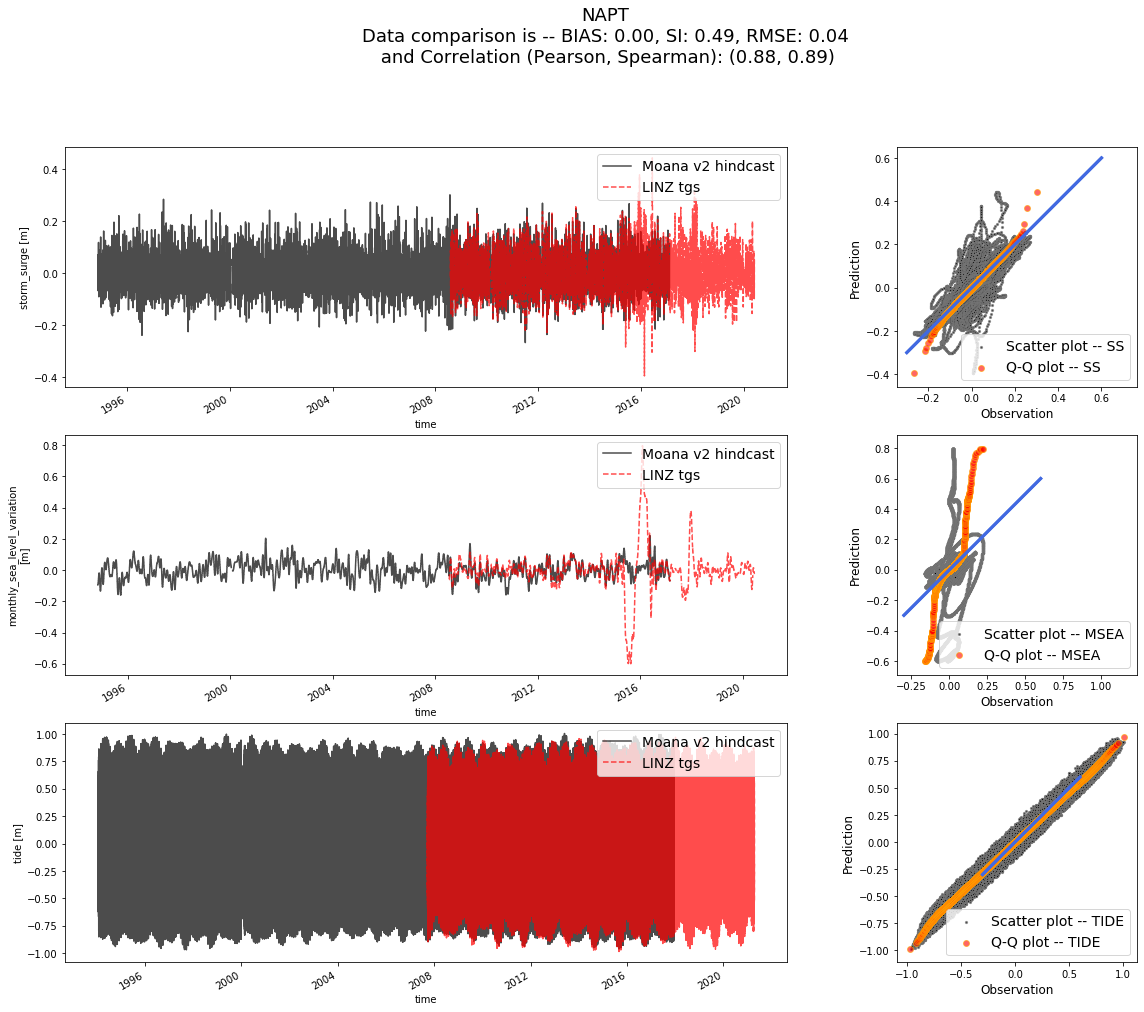

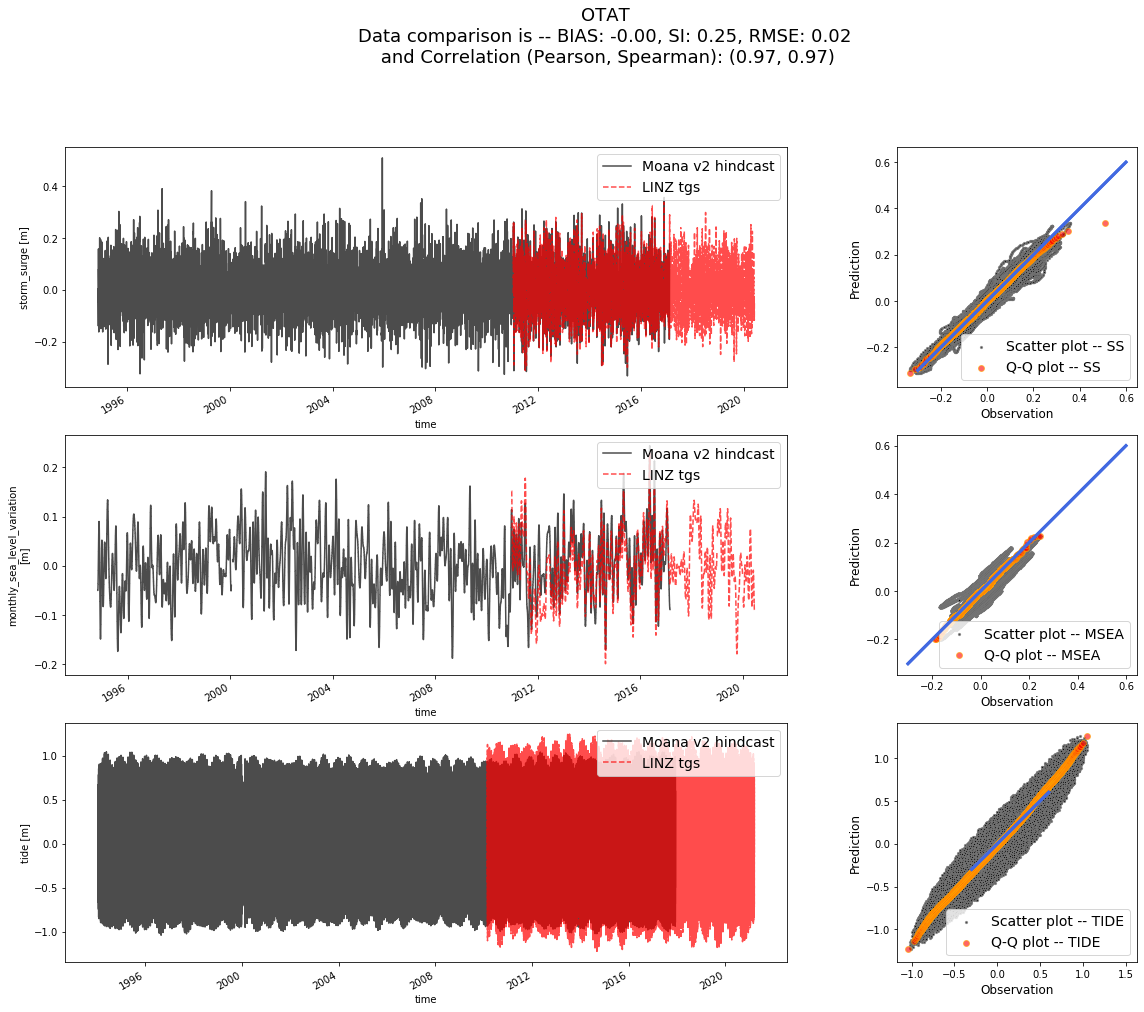

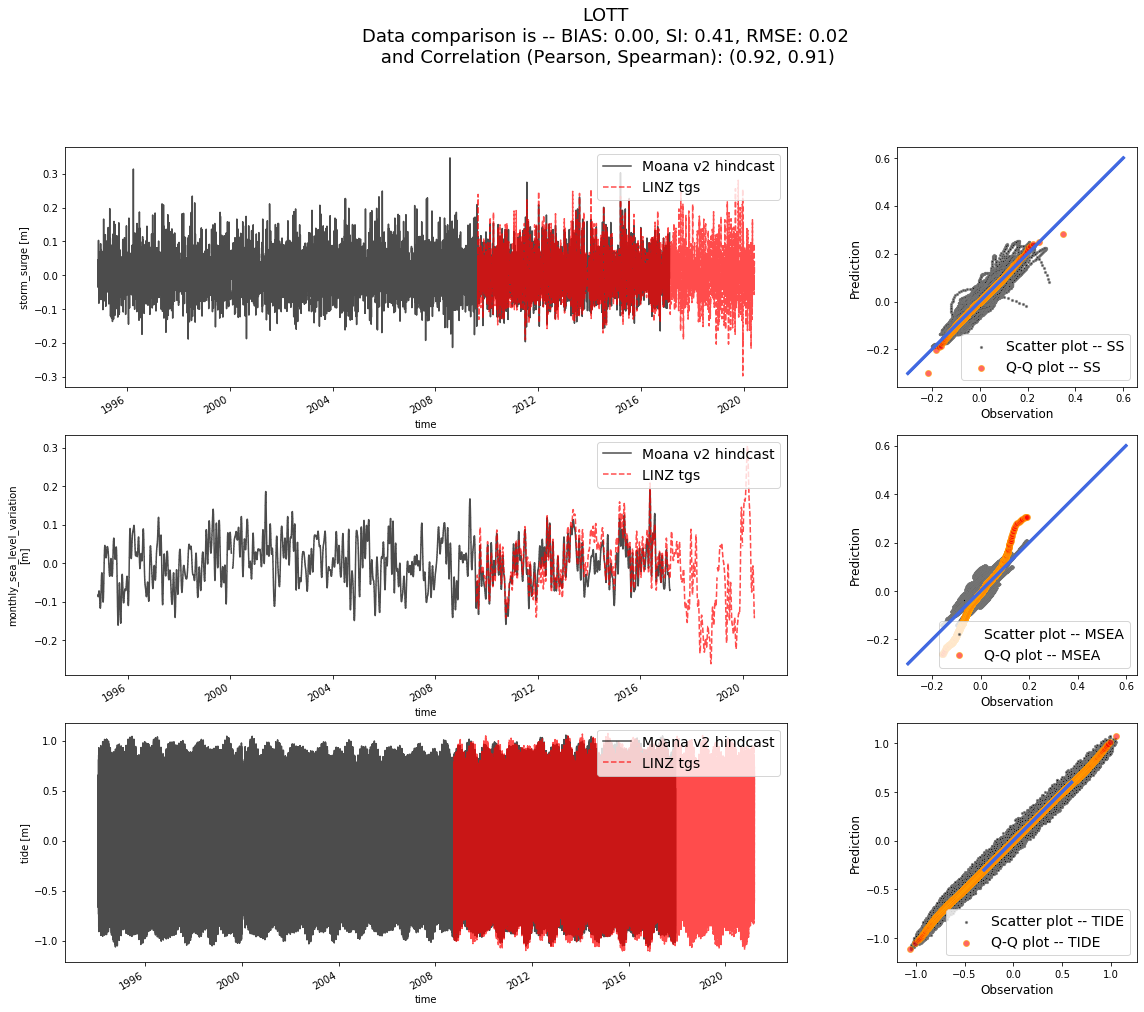

In [2]:
loader_linz = Loader(data_to_load=['cfsr','moana','linz'],plot=True)
loader_linz.validate_datasets(
    comparison_variables=[['ss','msea','tide'],['ss','msea','tide']]
)


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



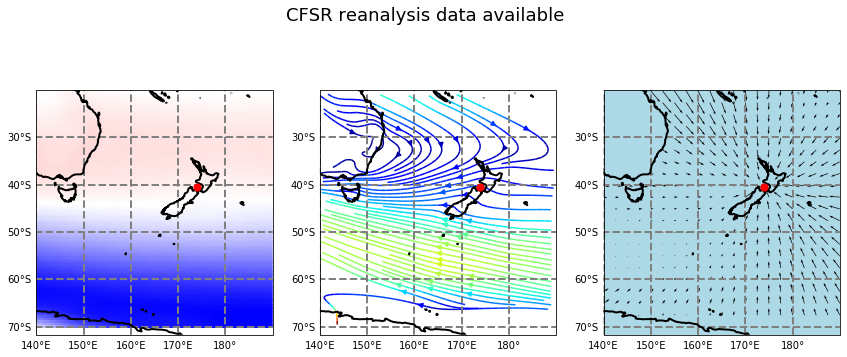


 loading the Moana v2 hindcast data... 



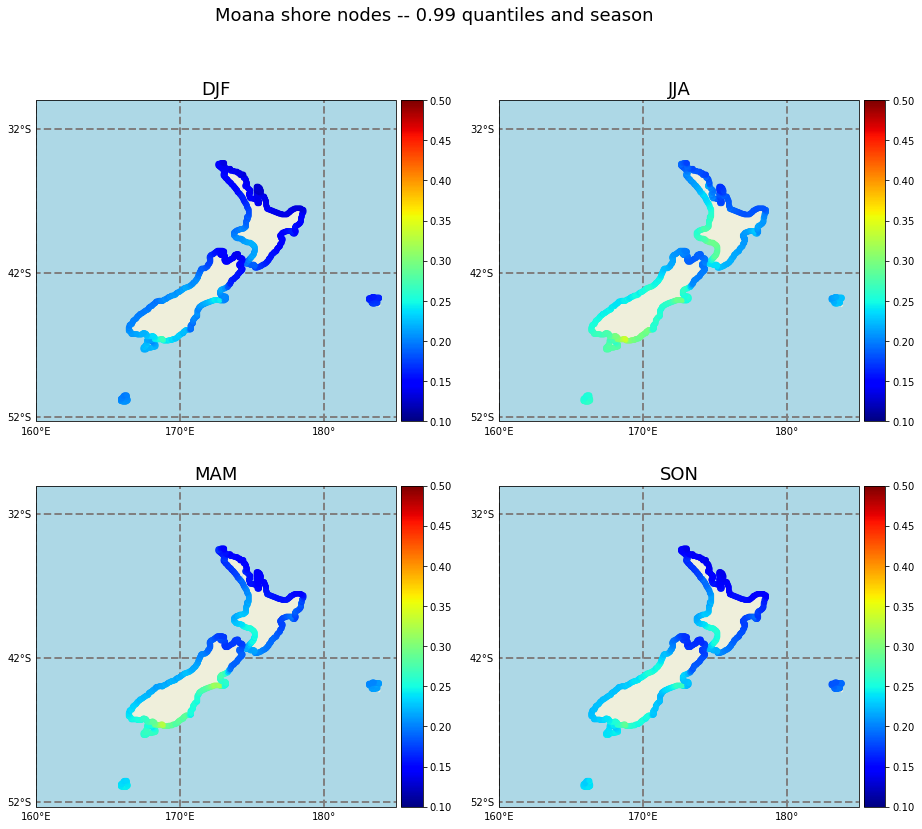


 loading and plotting the OTHER tidal guages... 



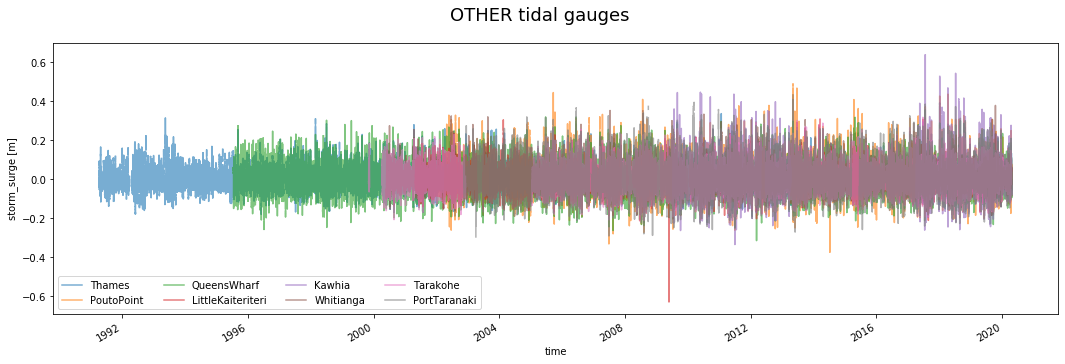

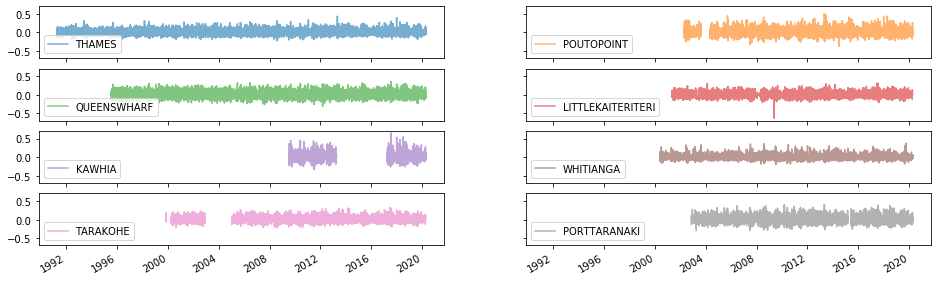


 Lets compare data in Moana v2 hindcast with OTHER tgs!! 


 
 TGs to analyze are: 
 ['Thames' 'PoutoPoint' 'QueensWharf' 'LittleKaiteriteri' 'Kawhia'
 'Whitianga' 'Tarakohe' 'PortTaranaki'] 


 which correspond to 
 [1174, 1260, 1217, 744, 1064, 1214, 803, 999] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to OTHER tgs: 
 [3.7511034902355385, 5.482027490429699, 7.339363979702297, 3.6193477047540705, 6.561342239106438, 11.820307701397114, 5.095093595142064, 1.28643175849521] 



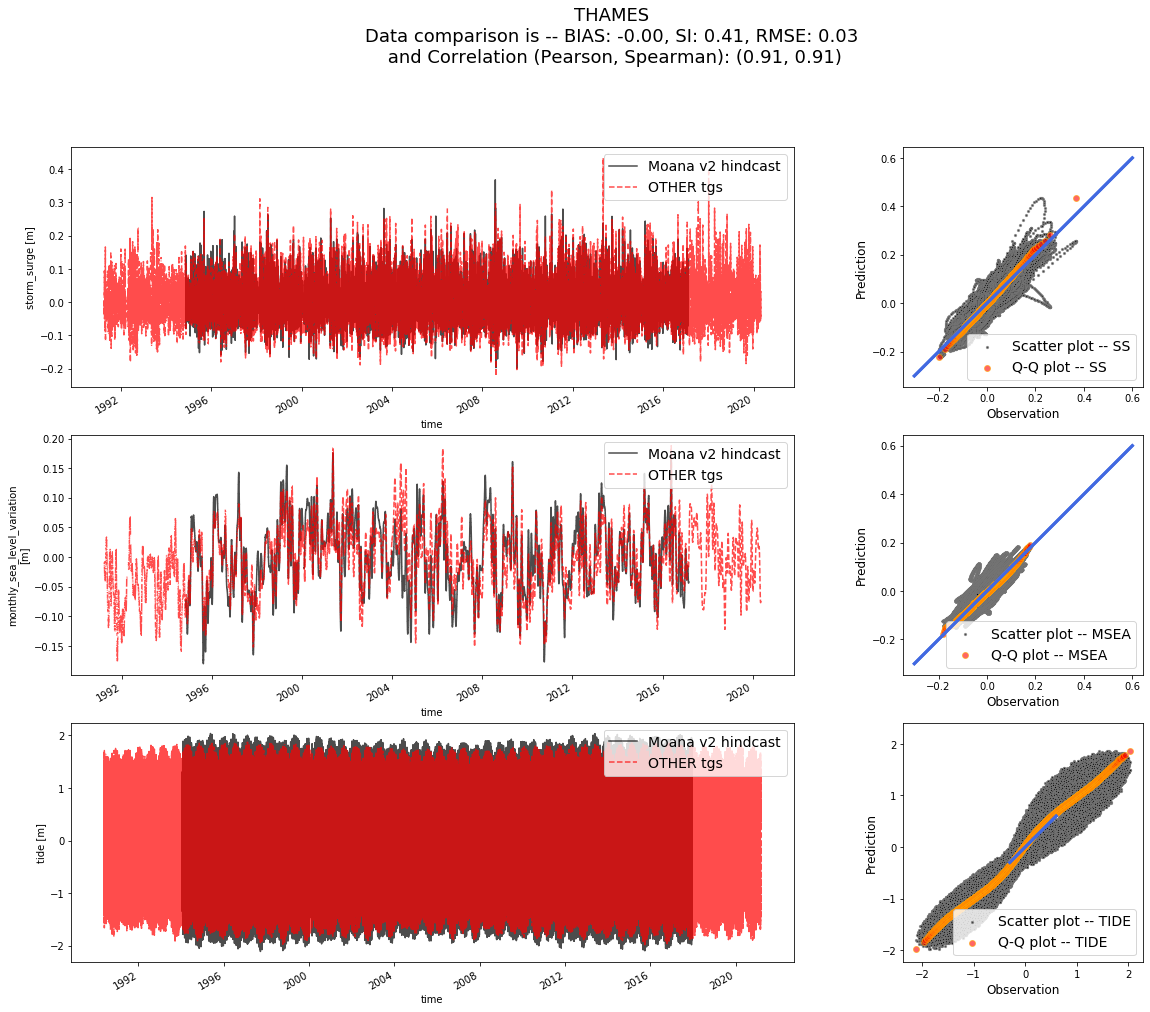

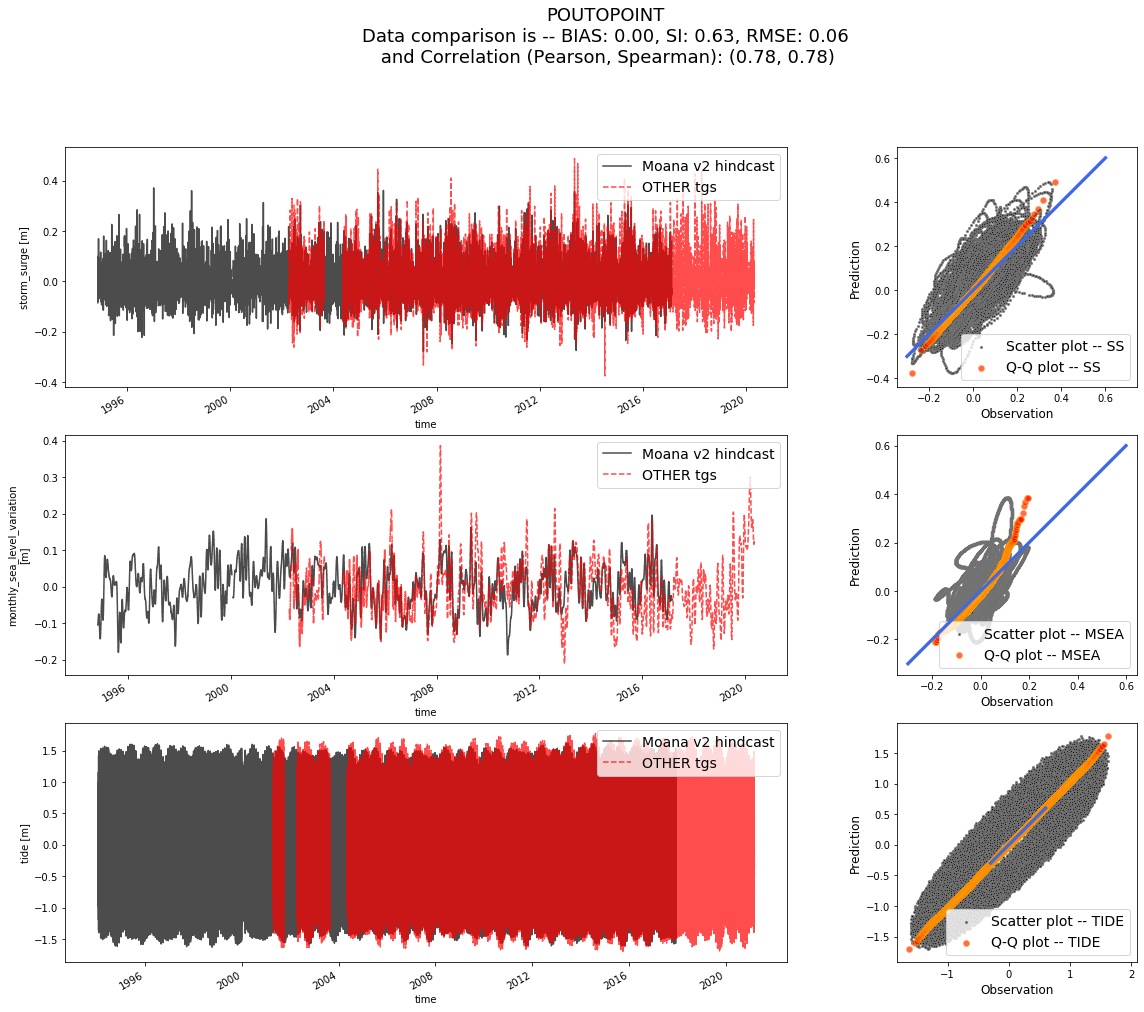

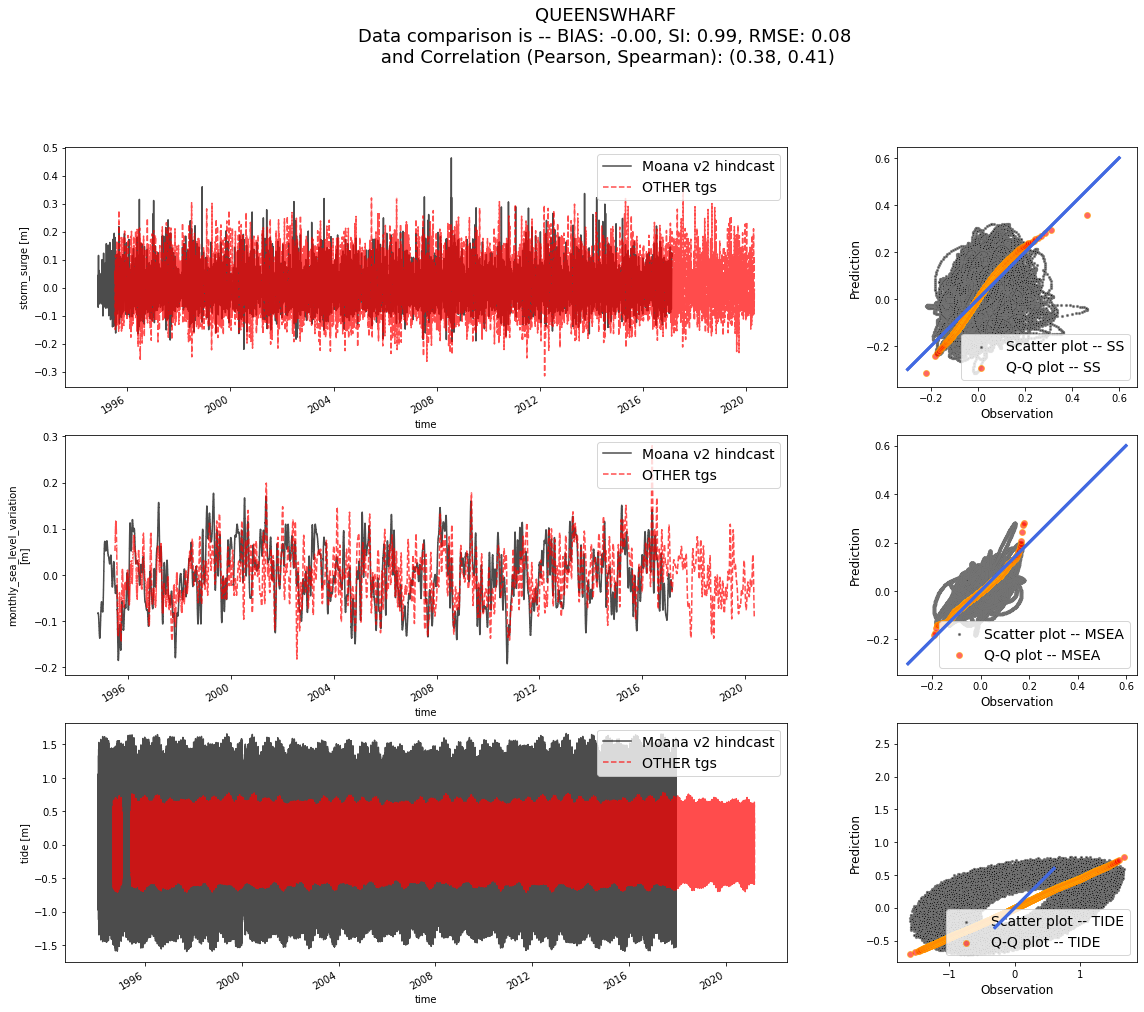

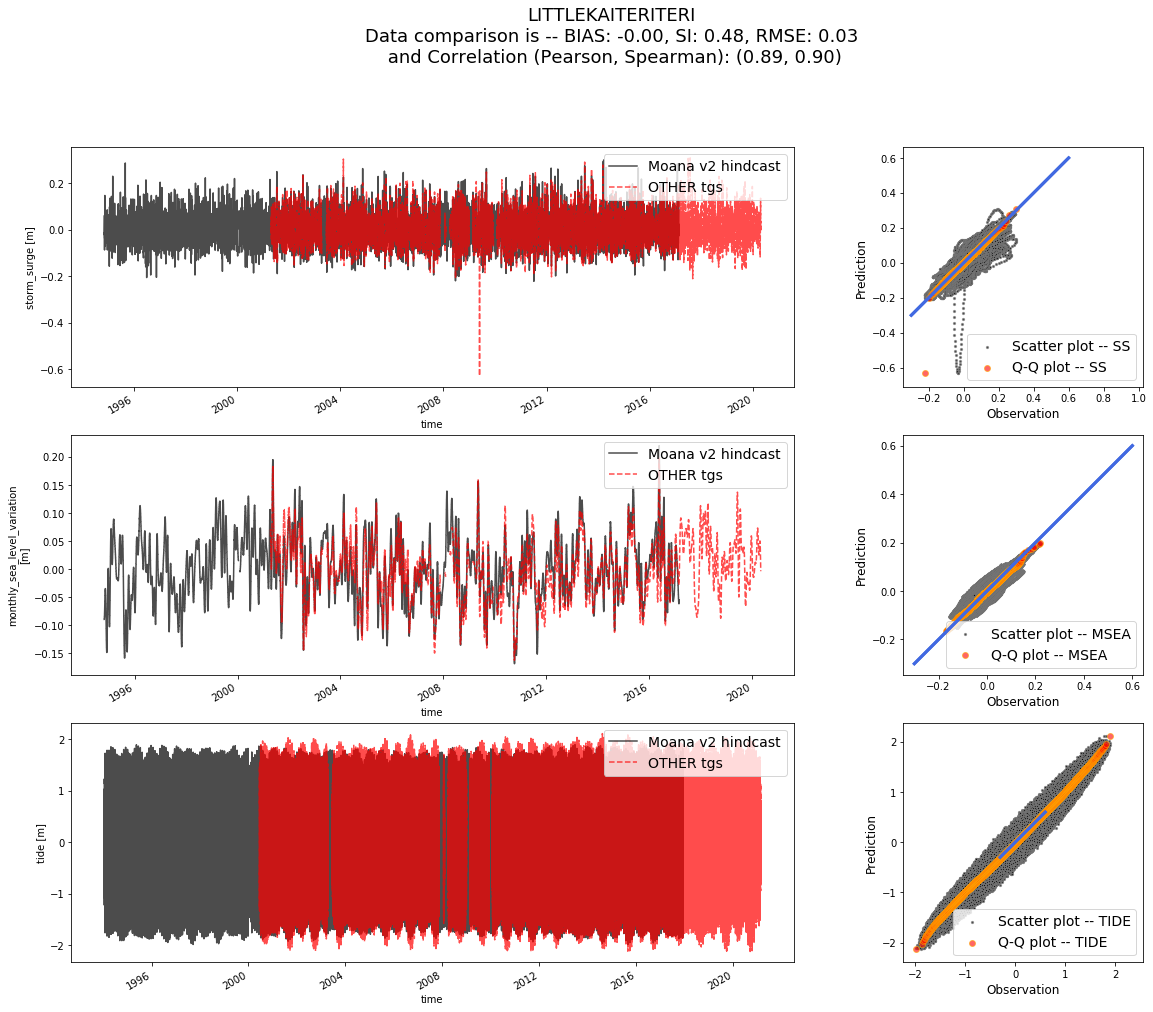

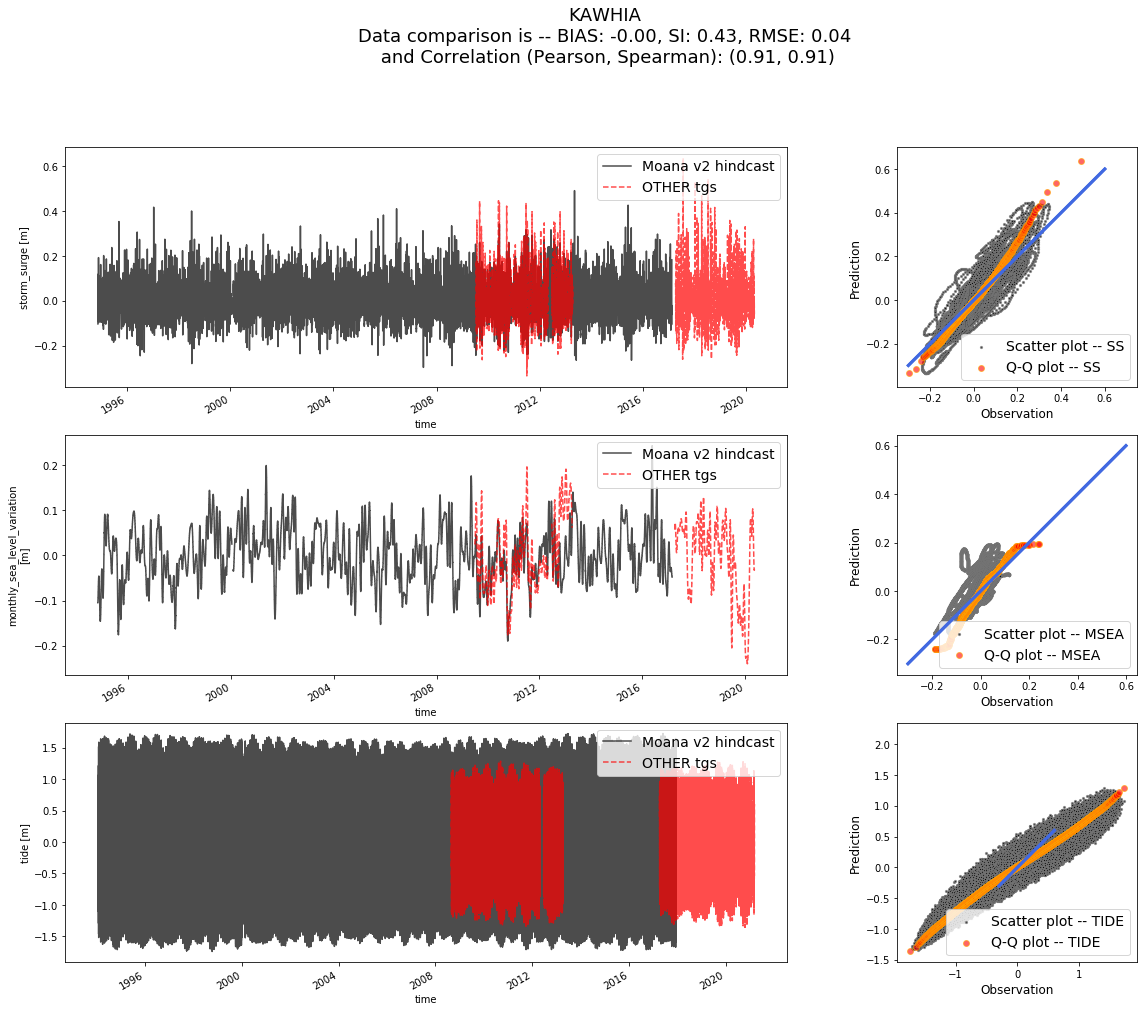

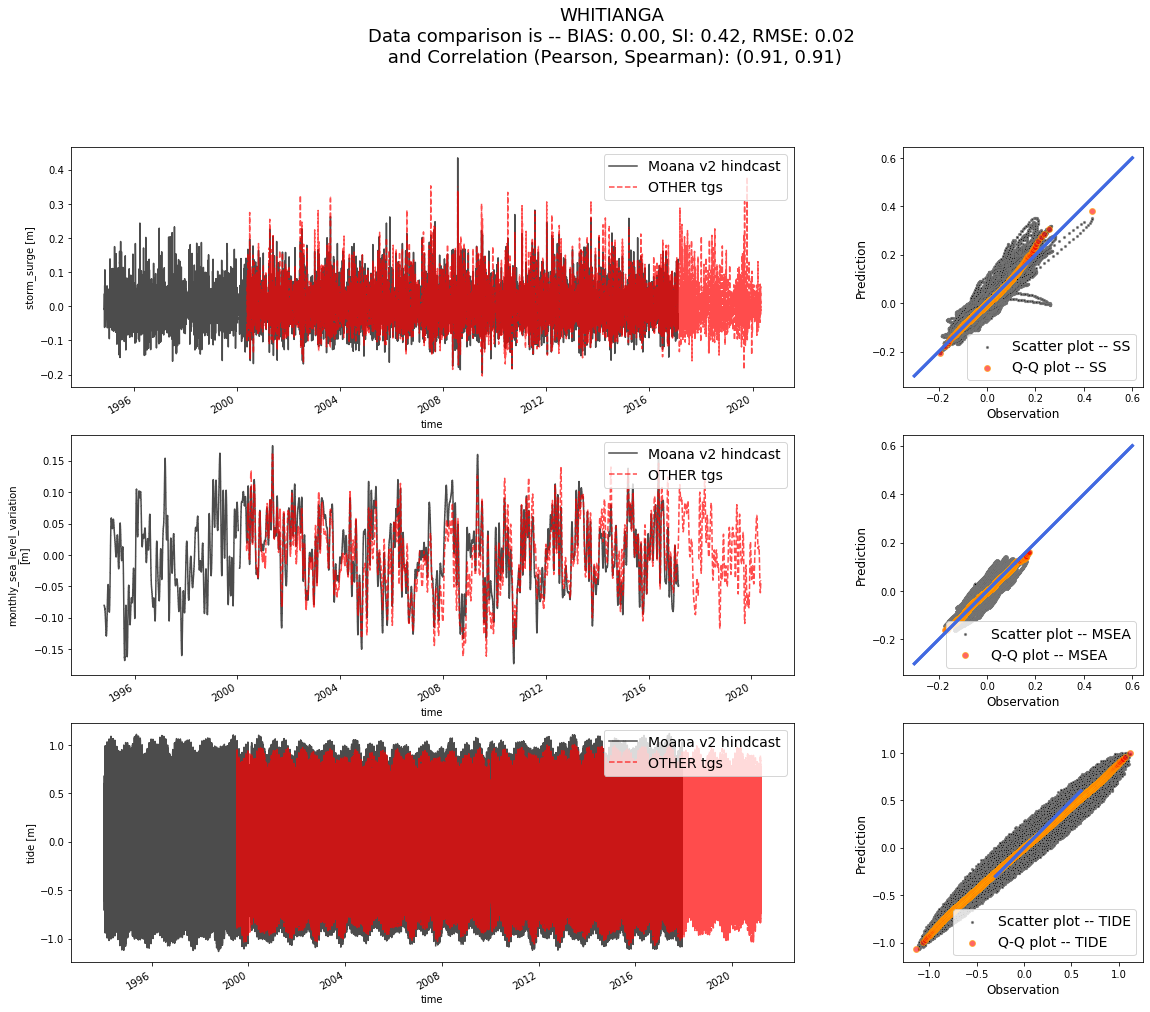

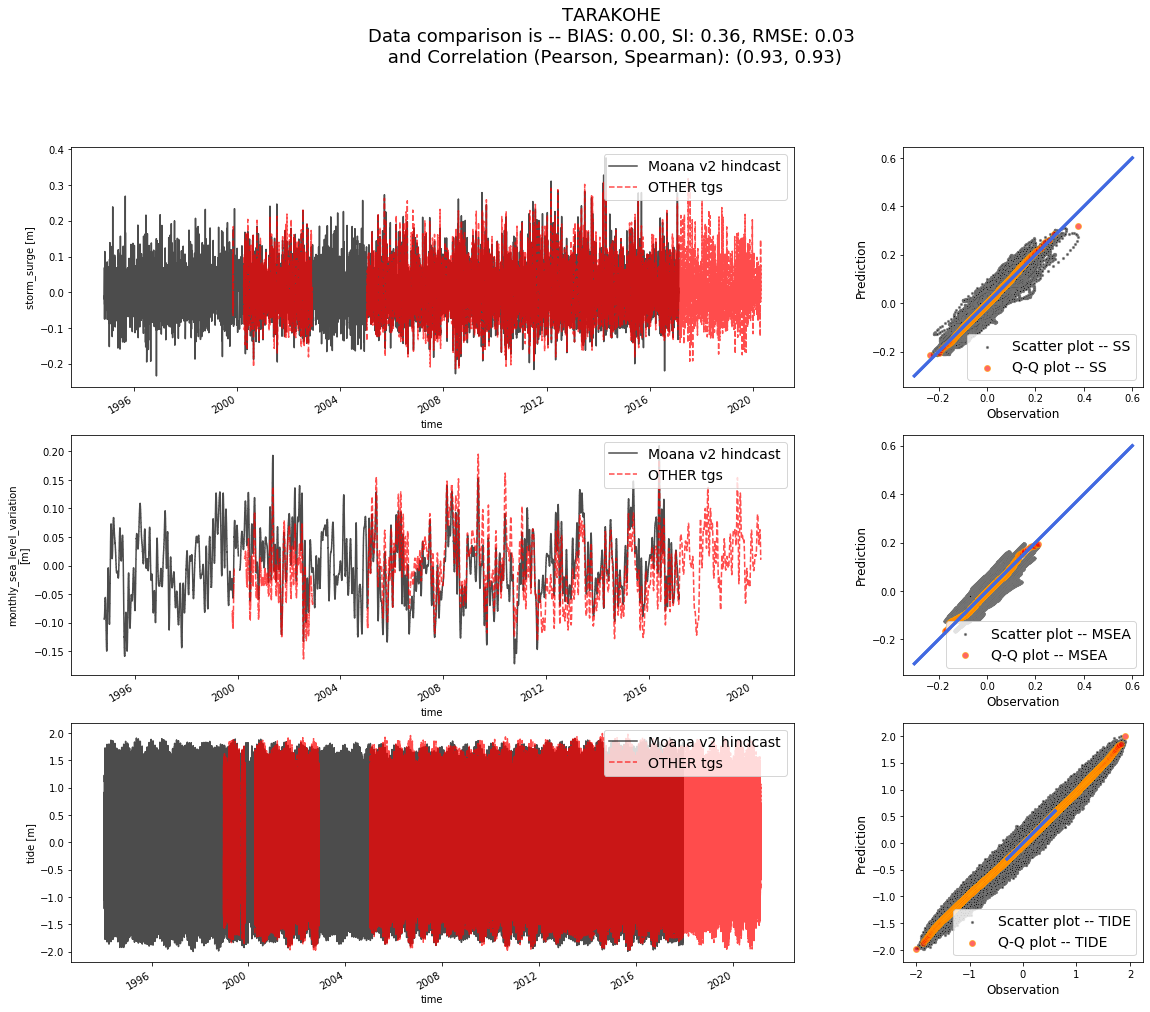

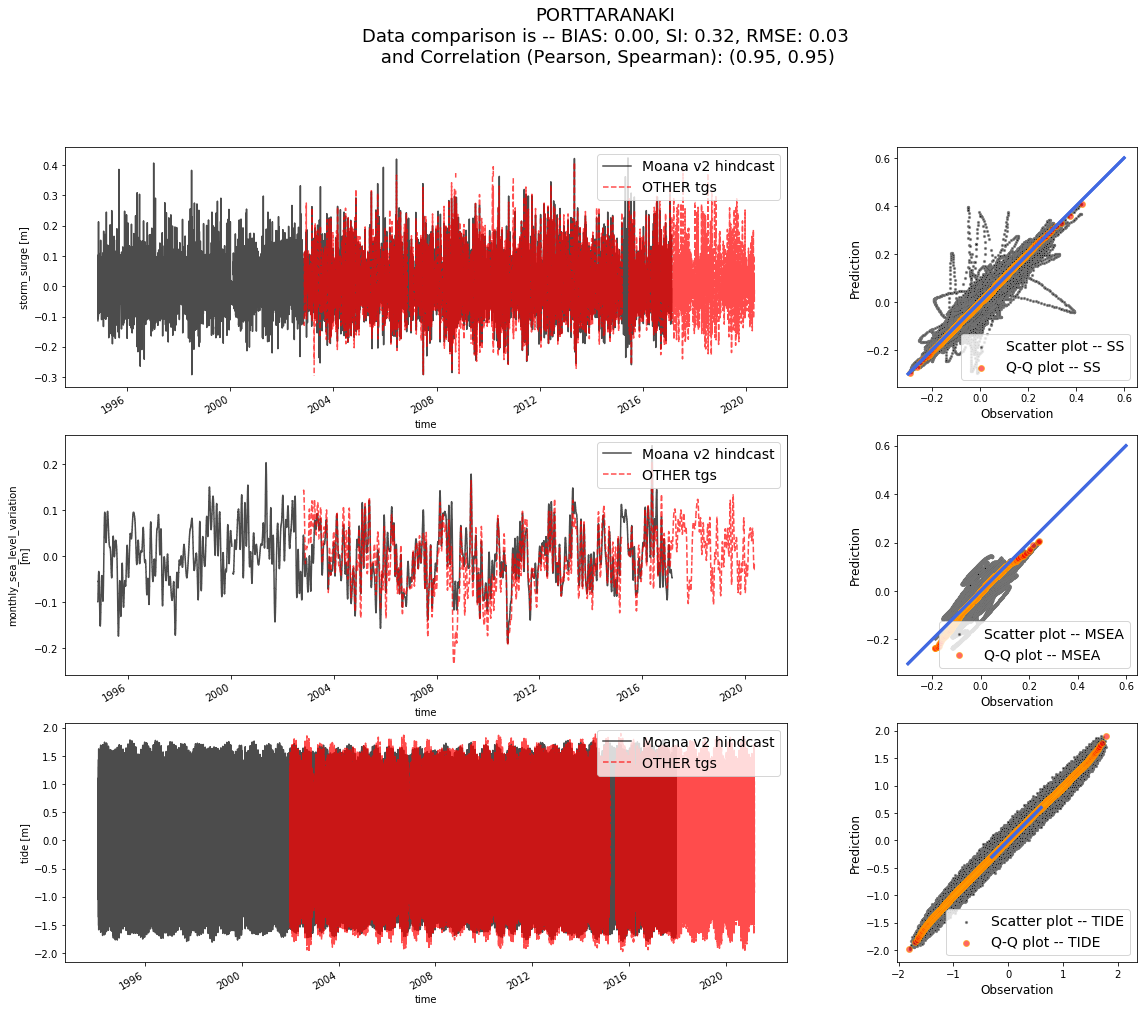

In [3]:
loader_other = Loader(data_to_load=['cfsr','moana','other'],plot=True)
loader_other.validate_datasets(
    comparison_variables=[['ss','msea','tide'],['ss','msea','tide']]
)

(Text(0.5, 1.0, 'LINZ'), Text(0.5, 1.0, 'OTHER'))

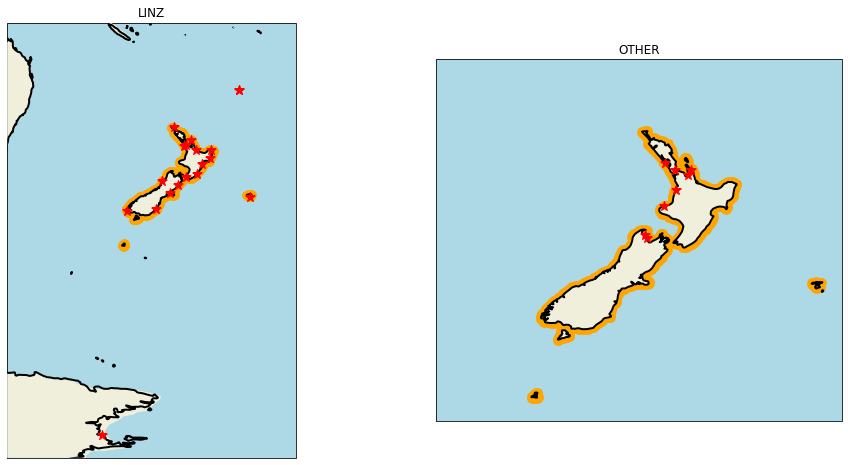

In [6]:
fig, axes = plt.subplots(ncols=2,figsize=(16,8),subplot_kw={
    'projection':ccrs.PlateCarree(central_longitude=180)
})
for iload,loader in enumerate([loader_linz,loader_other]):
    axes[iload].scatter(
        loader.predictand.lon.values,
        loader.predictand.lat.values,
        transform=ccrs.PlateCarree(),
        c='orange',s=50
    )
    axes[iload].scatter(
        loader.validator.longitude.values,
        loader.validator.latitude.values,
        transform=ccrs.PlateCarree(),zorder=200,
        s=100,c='red',marker='*'
    )
plot_ccrs_nz([axes[0]],plot_region=(True,(150,190,-20,-80)),plot_labels=(False,None,None))
plot_ccrs_nz([axes[1]],plot_region=(True,(170,178,-34,-44)),plot_labels=(False,None,None))
axes[0].set_facecolor('lightblue'), axes[1].set_facecolor('lightblue')
axes[0].set_title('LINZ'), axes[1].set_title('OTHER')

In [2]:
%config Completer.use_jedi = False

In [3]:
stats = xr.open_dataset('../data/statistics/experiment_1.nc')

In [10]:
lonlats = xr.open_zarr('../data/storm_surge_data/moana_hindcast_v2/moana_coast.zarr/')\
    [['lon','lat']].load().sel(site=stats.site.values)

In [21]:
stats.bias.values[:,0,0,0,0,0,0,0]

array([ 0.0050393 ,  0.00243844,  0.00169923,  0.00093091,  0.0007429 ,
        0.00110531,  0.00070299,  0.00021638, -0.00017688,  0.00027536])

In [22]:
stats.bias.shape

(10, 2, 1, 3, 3, 2, 1, 1)